In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

nakaza = pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/nakaza.csv', 
                     parse_dates=['datum'], index_col=['datum'])
testy  = pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/testy.csv',
                     parse_dates=['datum'], index_col=['datum'])


nakaza = nakaza.merge(testy, on='datum')

nakaza['procento_testu'] = nakaza.apply(lambda x: x['prirustkovy_pocet_nakazenych']/x['prirustkovy_pocet_testu'] if x['prirustkovy_pocet_testu']!=0 else 0, axis=1)
nakaza['klouzave_prirustky'] = nakaza.iloc[:,0].rolling(window=7).mean()

# Filter out messy data
nakaza = nakaza.loc['2020-03-01':]
nakaza.head(50)

,prirustkovy_pocet_nakazenych,kumulativni_pocet_nakazenych,prirustkovy_pocet_testu,kumulativni_pocet_testu,procento_testu,klouzave_prirustky
datum,,,,,,
2020-03-01,3,3,11,211,0.272727,0.428571
2020-03-02,0,3,51,262,0.000000,0.428571
2020-03-03,2,5,78,340,0.025641,0.714286
2020-03-04,1,6,67,407,0.014925,0.857143
2020-03-05,3,9,76,483,0.039474,1.285714
2020-03-06,11,20,111,594,0.099099,2.857143
2020-03-07,7,27,193,787,0.036269,3.857143
2020-03-08,6,33,141,928,0.042553,4.285714
2020-03-09,6,39,265,1193,0.022642,5.142857


In [293]:
# R estimation
win = 10

R = []
for i in range(0, nakaza.shape[0]-win):
    I0 = nakaza.iloc[i] + nakaza.iloc[i+1] + nakaza.iloc[i+2] + nakaza.iloc[i+3] 
    In = nakaza.iloc[i+6] + nakaza.iloc[i+7] + nakaza.iloc[i+8] + nakaza.iloc[i+9]
    
    R.append(In['prirustkovy_pocet_nakazenych'] / I0['prirustkovy_pocet_nakazenych'] if   I0['prirustkovy_pocet_nakazenych'] != 0 else 0)
    
for i in range(0, win):
    R.append(0)

    
RPKI = []

    
nakaza.insert(6, 'R', R, True)


nakaza.tail()

,prirustkovy_pocet_nakazenych,kumulativni_pocet_nakazenych,prirustkovy_pocet_testu,kumulativni_pocet_testu,procento_testu,klouzave_prirustky,R
datum,,,,,,,
2020-10-17,8712,168828,29276,1796928,0.297582,7831.285714,0.0
2020-10-18,5058,173886,17185,1814113,0.294326,8110.428571,0.0
2020-10-19,8076,181962,31053,1845166,0.260071,8648.571429,0.0
2020-10-20,11984,193946,40403,1885569,0.296612,9171.428571,0.0
2020-10-21,14968,208914,44039,1929608,0.339881,9946.285714,0.0


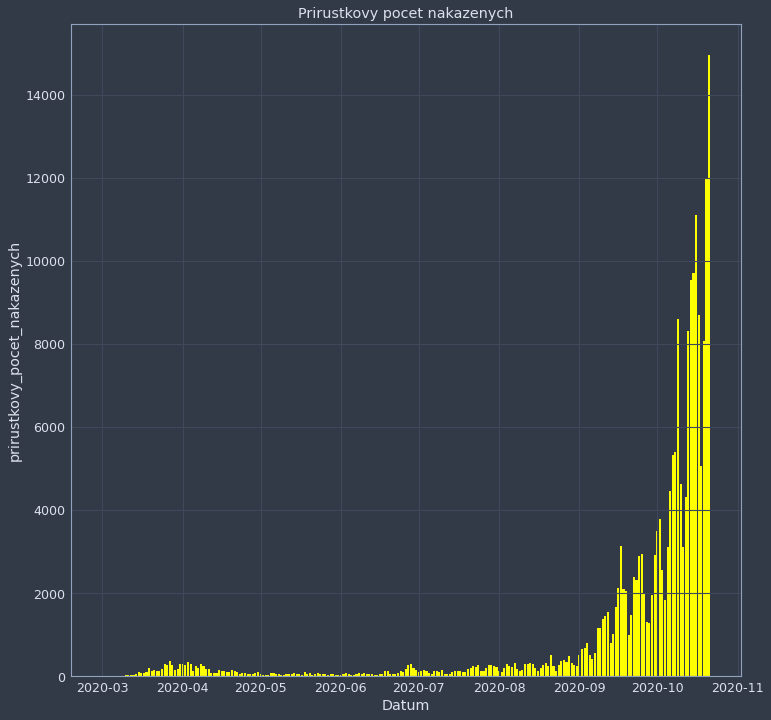

In [294]:
#mask = (nakaza['datum'] > '2020-09-01') & (nakaza['datum'] < '2020-10-13')
#mask = nakaza['datum'] > '2020-03-01'
#df = nakaza.loc[mask]
df = nakaza


def cplot(df, column_str, title, bars=False):
    fig, ax = plt.subplots(figsize=(12, 12))
    if bars:
        ax.bar(
            df.index.values,
            df[column_str],
            color='yellow'
        )
    else:
        ax.plot(df.index.values,
           df[column_str],
            marker='o',
           color='yellow')

# Set title and labels for axes
    ax.set(xlabel="Datum",
       ylabel=column_str,
       title=title)
    plt.show()

cplot(df, 'prirustkovy_pocet_nakazenych', "Prirustkovy pocet nakazenych", True)    
#df['prirustkovy_pocet_nakazenych'].plot(linewidth=1.5)

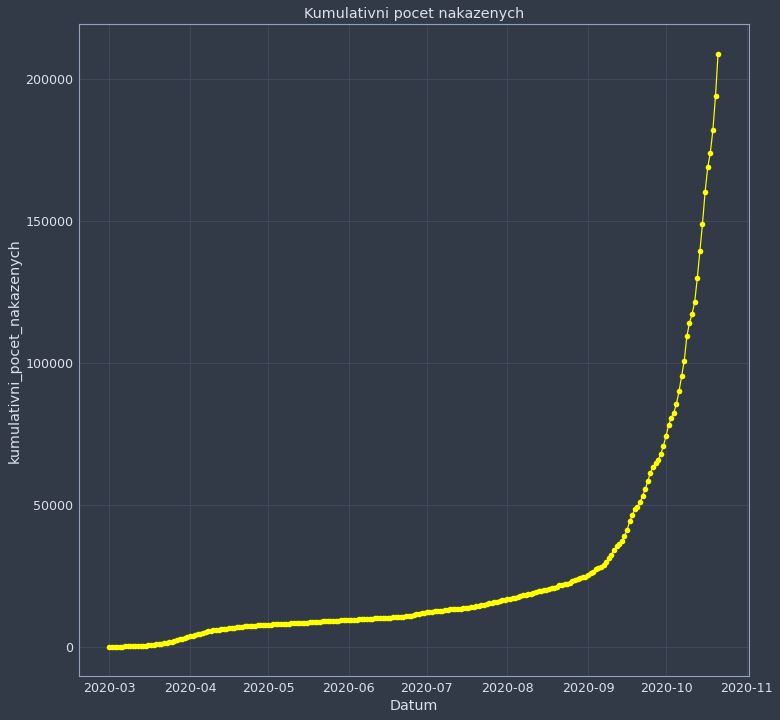

In [295]:
cplot(df, 'kumulativni_pocet_nakazenych', "Kumulativni pocet nakazenych")   

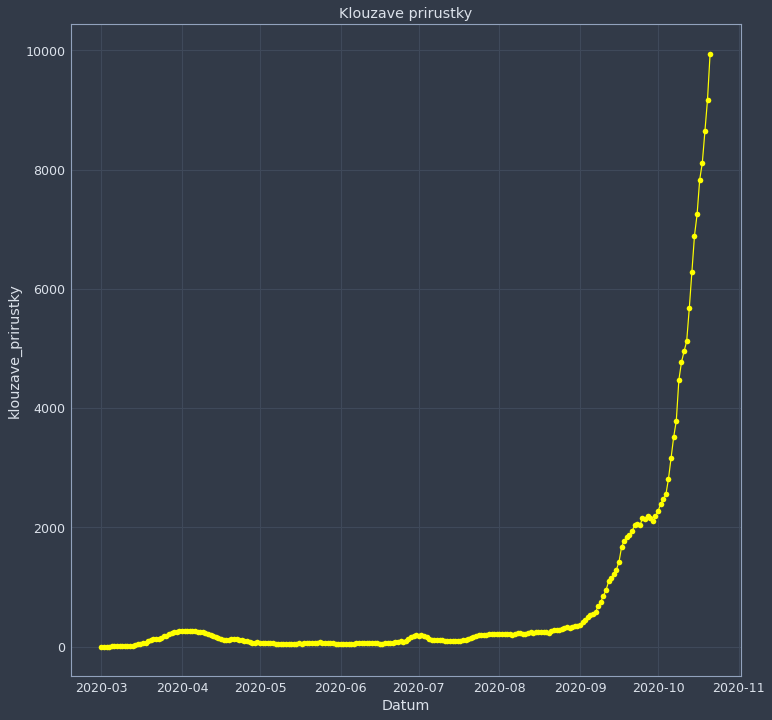

In [296]:
cplot(df, 'klouzave_prirustky', 'Klouzave prirustky')

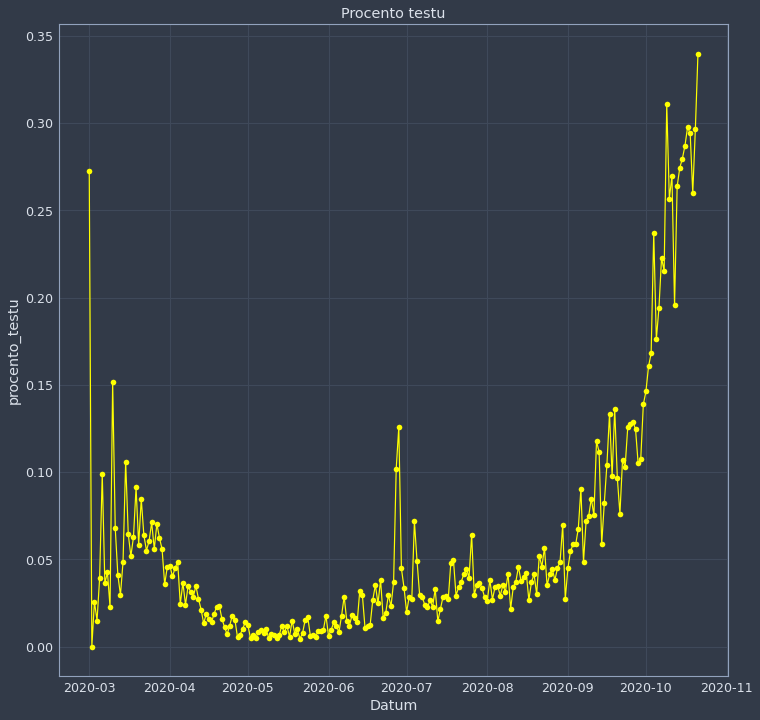

In [297]:
cplot(df, 'procento_testu', 'Procento testu')

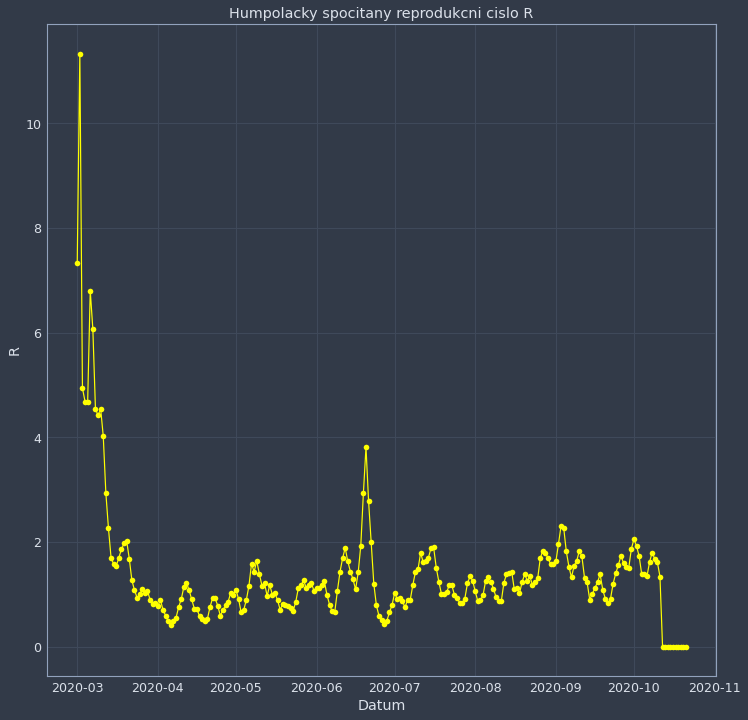

In [298]:
cplot(df, 'R', 'Humpolacky spocitany reprodukcni cislo R')

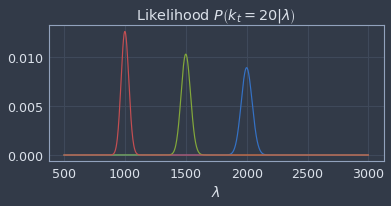

In [299]:
from scipy import stats as sps
from scipy.interpolate import interp1d
import numpy as np
k = 2000

lam = np.linspace(500, 3000, 1000)

likelihood = pd.Series(data=sps.poisson.pmf(k, lam),
                       index=pd.Index(lam, name='$\lambda$'),
                       name='lambda')

likelihood.plot(title=r'Likelihood $P\left(k_t=20|\lambda\right)$', figsize=(6,2.5));
likelihood2 = pd.Series(data=sps.poisson.pmf(1500, lam),
                       index=pd.Index(lam, name='$\lambda$'),
                       name='lambda')

likelihood2.plot(title=r'Likelihood $P\left(k_t=20|\lambda\right)$', figsize=(6,2.5));
likelihood3 = pd.Series(data=sps.poisson.pmf(1000, lam),
                       index=pd.Index(lam, name='$\lambda$'),
                       name='lambda')

likelihood3.plot(title=r'Likelihood $P\left(k_t=20|\lambda\right)$', figsize=(6,2.5));

In [300]:
hundreds = []
for i in range(df.shape[0]):
    record = df.iloc[i]
    hundreds.append(int(0.5+record['klouzave_prirustky']/100))
    #hundreds.append(int(0.5+record['prirustkovy_pocet_nakazenych']/100))

    
hundreds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 7,
 8,
 9,
 9,
 11,
 11,
 12,
 13,
 14,
 17,
 18,
 18,
 19,
 19,
 20,
 21,
 20,
 22,
 21,
 22,
 22,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 32,
 35,
 38,
 45,
 48,
 50,
 51,
 57,
 63,
 69,
 72,
 78,
 81,
 86,
 92,
 99]

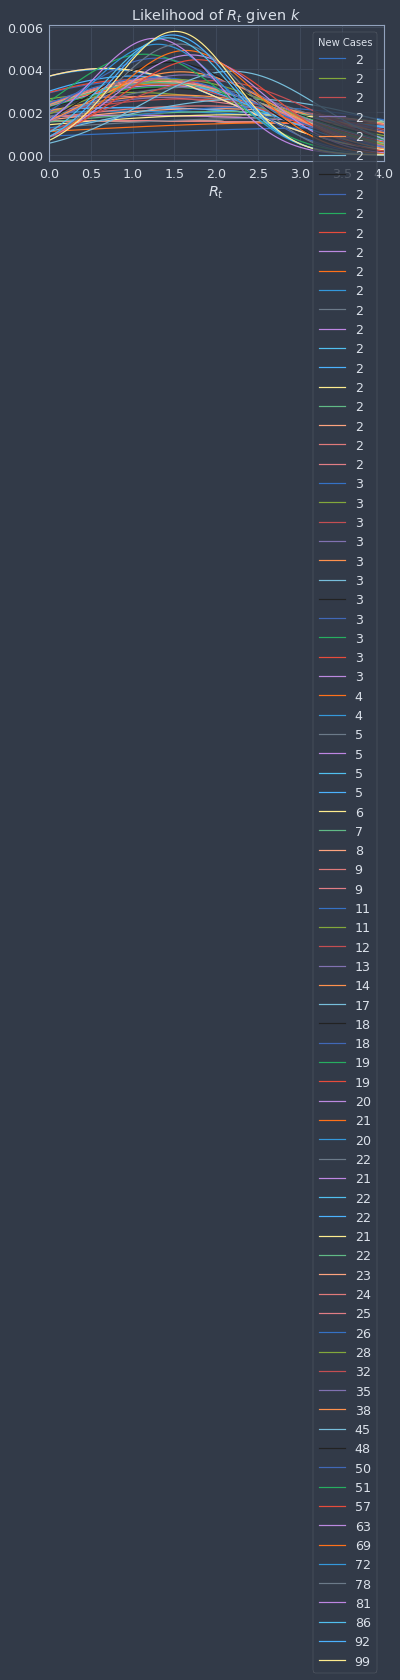

In [301]:
#k = np.array([9544, 9722, 11104, 8712, 5058, 8076, 11984, 14968])



#k = np.array([83, 95, 97, 111, 87, 50, 81, 120, 150])

k = np.array(hundreds[150:])

# We create an array for every possible value of Rt
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)

# Gamma is 1/serial interval
# https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article
# https://www.nejm.org/doi/full/10.1056/NEJMoa2001316
GAMMA = 1/7

# Map Rt into lambda so we can substitute it into the equation below
# Note that we have N-1 lambdas because on the first day of an outbreak
# you do not know what to expect.
lam = k[:-1] * np.exp(GAMMA * (r_t_range[:, None] - 1))

# Evaluate the likelihood on each day and normalize sum of each day to 1.0
likelihood_r_t = sps.poisson.pmf(k[1:], lam)
likelihood_r_t /= np.sum(likelihood_r_t, axis=0)

# Plot it
ax = pd.DataFrame(
    data = likelihood_r_t,
    index = r_t_range
).plot(
    title='Likelihood of $R_t$ given $k$',
    xlim=(0,4),
    figsize=(6,2.5)
)

ax.legend(labels=k[1:], title='New Cases')
ax.set_xlabel('$R_t$');

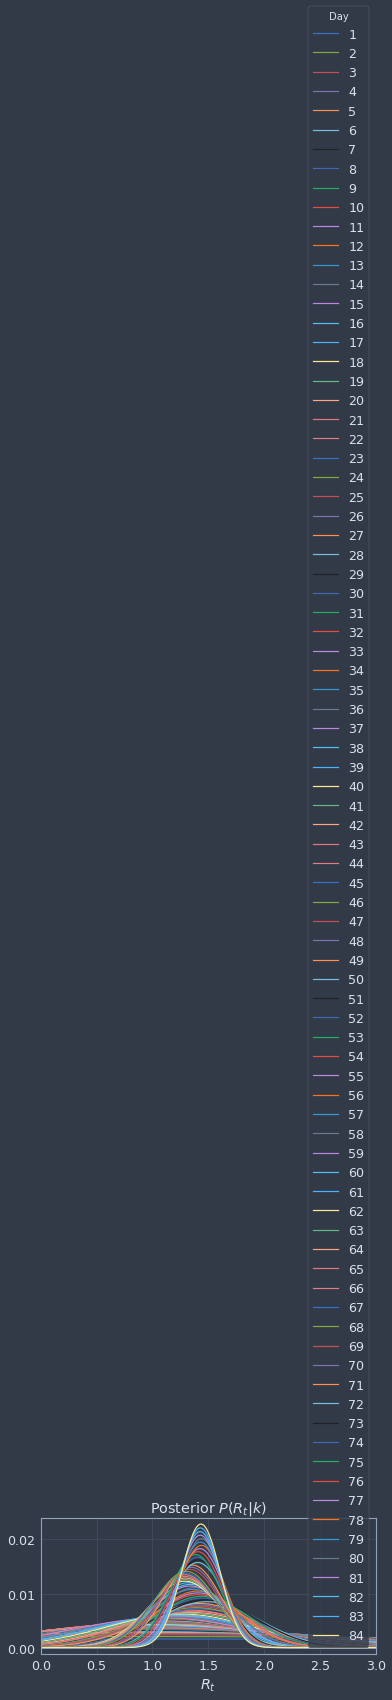

In [302]:
posteriors = likelihood_r_t.cumprod(axis=1)
posteriors = posteriors / np.sum(posteriors, axis=0)


columns = pd.Index(range(1, posteriors.shape[1]+1), name='Day')



posteriors = pd.DataFrame(
    data = posteriors, #[:,30:31],
    index = r_t_range,
    columns = columns #[30:31]
)
ax = posteriors.plot(
    title='Posterior $P(R_t|k)$',
    xlim=(0,3),
    figsize=(6,2.5)
)
ax.legend(title='Day')
ax.set_xlabel('$R_t$');

In [303]:
most_likely_values = posteriors.idxmax(axis=0)
most_likely_values

Day
1     1.00
2     1.00
3     1.00
4     1.00
5     1.00
      ... 
80    1.44
81    1.43
82    1.43
83    1.43
84    1.44
Length: 84, dtype: float64

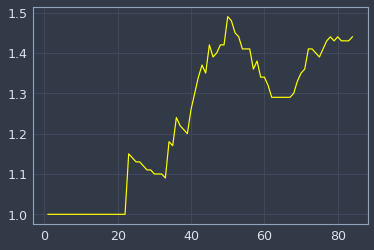

In [306]:
plt.plot(most_likely_values, color='yellow')